## Respuestas Miniproyecto 2

Utiliza este cuaderno como base para implementar las visualizaciones 

# Importar librerías de python

In [1]:
# Importar el módulo seaborn abreviado a sns
import seaborn as sns

# Importar el módulo pyploy de matplotlib abreviado a plt
import matplotlib.pyplot as plt

# Importar el módulo pandas abreviado a pd
import pandas as pd

# Caso 1: Videoconferencias

# Cargar *dataset*

In [11]:
#lectura del dataset de videoconferencia haciendo el pivote con las variables Día y Semana, acumulando por Horas
dataset_video = pd.read_csv('videoconferencia.csv').pivot(index="Día", columns="Semana", values="Horas")
dataset_video

Semana,Semana 01,Semana 02,Semana 03,Semana 04,Semana 05,Semana 06,Semana 07,Semana 08,Semana 09,Semana 10,Semana 11,Semana 12
Día,,,,,,,,,,,,
Domingo,681186,1328314,1634848,1779600,1498611,2554450,2145738,2903559,3242449,4851753,4768308,7029848
Jueves,1873263,1623495,2497685,2966001,3090885,3902633,5245139,4355338,5944491,7277630,6993518,8592037
Lunes,1873263,2435243,2997222,2372801,3090885,4292896,4808044,4355338,6687552,9703507,7867708,12888056
Martes,908249,1475904,2179798,2372801,2247916,2270623,3814646,2815572,6484899,5292822,5086195,7029848
Miércoles,1717158,1826432,1998148,2669401,3777749,3122106,3933854,5807118,6687552,9703507,9616088,8592037
Sábado,851483,885542,1362373,1617818,1873263,1702967,2860984,2375639,4863674,4410685,3814646,4686565
Viernes,908249,1623495,1998148,1941382,2247916,2838278,3178872,3871412,5404082,5292822,7629293,8592037


# Mapa de calor secuencial de videoconferencias

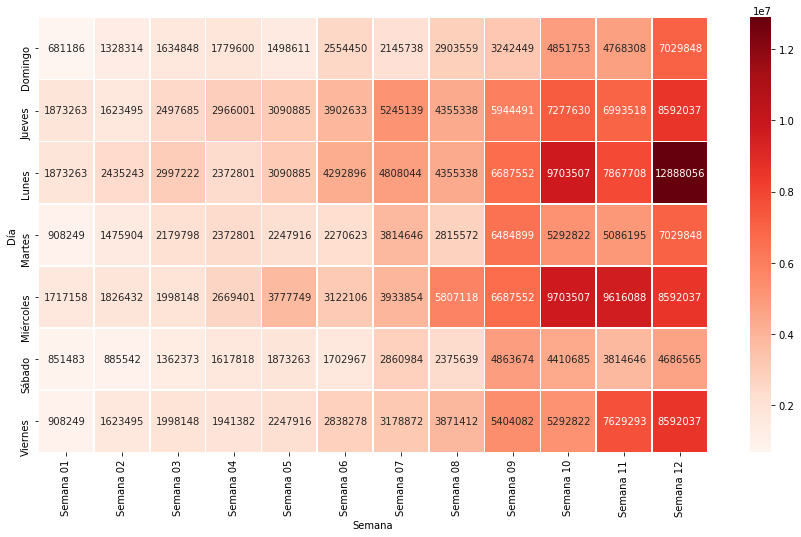

In [13]:
# plt.rcParams['figure.figsize'] permite específicar las dimensiones del gráfico creado
plt.rcParams['figure.figsize'] = (15.0, 8.0)
# sns.heatmap recibe el dataset indexado y crea un mapa de calor
ax = sns.heatmap(dataset_video, annot=True, fmt="d", annot_kws={'size':10}, cmap='Reds', linewidths=.5)

# Mapa de calor divergente de videoconferencias

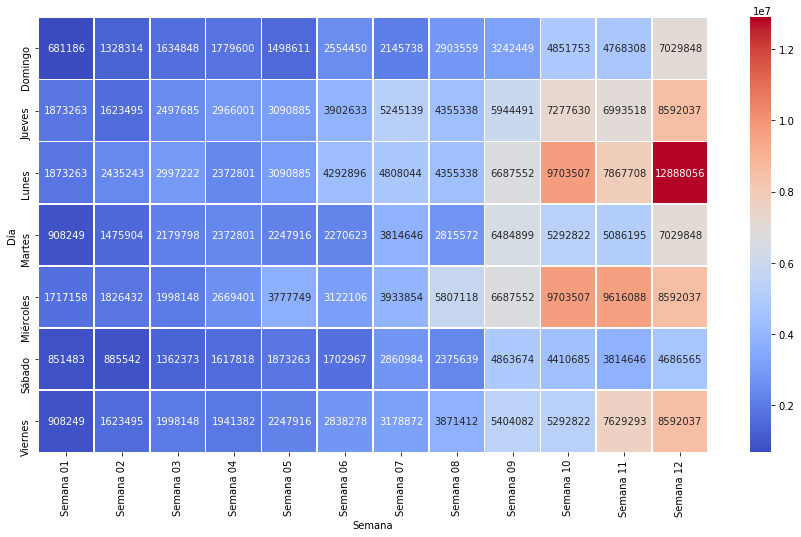

In [14]:
# plt.rcParams['figure.figsize'] permite específicar las dimensiones del gráfico creado
plt.rcParams['figure.figsize'] = (15.0, 8.0)
# sns.heatmap recibe el dataset indexado y crea un mapa de calor
ax = sns.heatmap(dataset_video, annot=True, fmt="d", annot_kws={'size':10}, cmap='coolwarm', linewidths=.5)

Es más efectiva la paleta de color del mapa de calor secuencial puesto que los valores se mueven dentro de un rango positivo, no presenta fluctuaciones extremas entre un polo y otro como en el caso de considerar variaciones de acciones entre un rango -50 a +50, en ese caso sería mejor visualmente utilizar la paleta divergente para poder identificar los extremos

# Caso 2: Titanic

# Carga de datos 

In [16]:
#Carga de dataset de titanic
df_titanic = sns.load_dataset("titanic")
# Ver las primeras 5 líneas del archivo
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Procesamiento de datos

In [19]:
#Se acumulan los datos mediante la clase para poder armar el gráfico de mapa de calor
clases_titanic = df_titanic.groupby('class').count()
clases_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


# Pregunta 1 

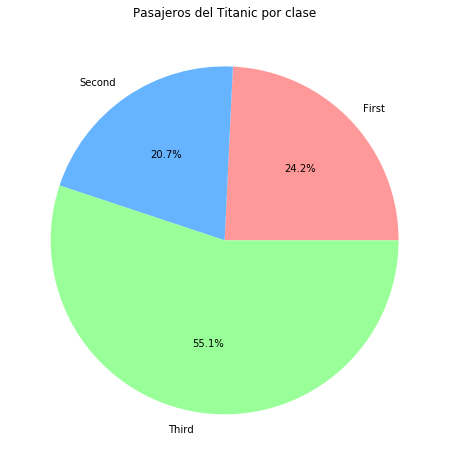

In [21]:
# Se crea una figura en matplotlib para poner el gráfico de tamaño 8x8  pulgadas
fig = plt.figure(figsize=(8, 8))

# A la figura se le agrega un gráfico
plot = fig.add_subplot()

# Se crea un gráfico de torta con el método pie y se le entrega la lista de valores.
# En este caso el método retorna una lista con los diferentes objetos presentes en la visualización
pie_plot = plot.pie(clases_titanic["pclass"], autopct='%1.1f%%',labels =  clases_titanic.index, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'])

#Se asigna un título al gráfico
plot.set_title("Pasajeros del Titanic por clase")

# Visualizar el gráfico
plt.show()

# Pregunta 2

Primero creo un dataset filtrado que contiene únicamente los valores iguales a 0 que serían los pasajeros que no sobrevivieron

In [26]:
#Creacion de dataset con el filtro de que el pasajero no haya sobrevivido
titanic_0 = df_titanic[df_titanic.survived == 0]
titanic_0_classes = titanic_0.groupby('class').count()
titanic_0_classes

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,80,80,80,64,80,80,80,80,80,80,58,80,80,80
Second,97,97,97,90,97,97,97,97,97,97,3,97,97,97
Third,372,372,372,270,372,372,372,372,372,372,6,372,372,372


Mismo dataset pero para el caso contrario

In [28]:
#Creacion de dataset con el filtro de que el pasajero haya sobrevivido
titanic_1 = df_titanic[df_titanic.survived == 1]
titanic_1_classes = titanic_1.groupby('class').count()
titanic_1_classes

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


# Gráficos múltiples

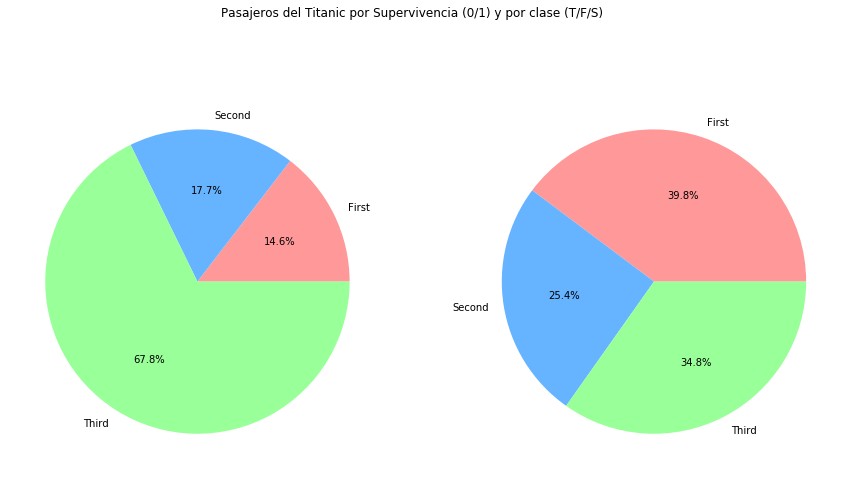

In [31]:
#Creacion de subplots para ubicar los gráficos de torta
fig, (ax1, ax2) = plt.subplots(1, 2)

# Create two subplots and unpack the output array immediately
ax1.pie(titanic_0_classes["pclass"], autopct='%1.1f%%',labels =  titanic_0_classes.index, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax2.pie(titanic_1_classes["pclass"], autopct='%1.1f%%',labels =  titanic_1_classes.index, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'])

#Se asigna un título al gráfico
fig.suptitle("Pasajeros del Titanic por Supervivencia (0/1) y por clase (T/F/S)")

# Visualizar el gráfico
plt.show()

a) De los supervivientes, ¿Cuál es la clase de pasajero más común? R: La clase más común es la primera clase o "First"

b) De los no supervivientes, ¿Cuál es la clase de pasajero más común? R: La clase más común es la tercera clase o "Third"

c) ¿Cree que este gráfico es más efectivo que un gráfico de barras para comparar categorías? R: Si, porque permite ver las proporciones de las diferentes clases agrupadas,además el número de clases es acotado y permite poder tener una visualización clara de cada una y de sus proporciones, el gráfico de barras sería más útil para utilizarlo observando una variable ordenada versus una de cantidad y en donde las clases podrían considerarse como una marca de color para poder armar un gráfico de barras o uno de barras superpuestas.

# Caso 3: Peliculas

# Importando datos

In [32]:
#Carga de datos
dataset_peliculas = pd.read_csv('peliculas.csv')
dataset_peliculas

,género,año,cantidad
0,acción,2010,11
1,acción,2011,14
2,acción,2012,22
3,acción,2013,11
4,acción,2014,12
...,...,...,...
125,mundo mágico,2015,29
126,mundo mágico,2016,30
127,mundo mágico,2017,11
128,mundo mágico,2018,22


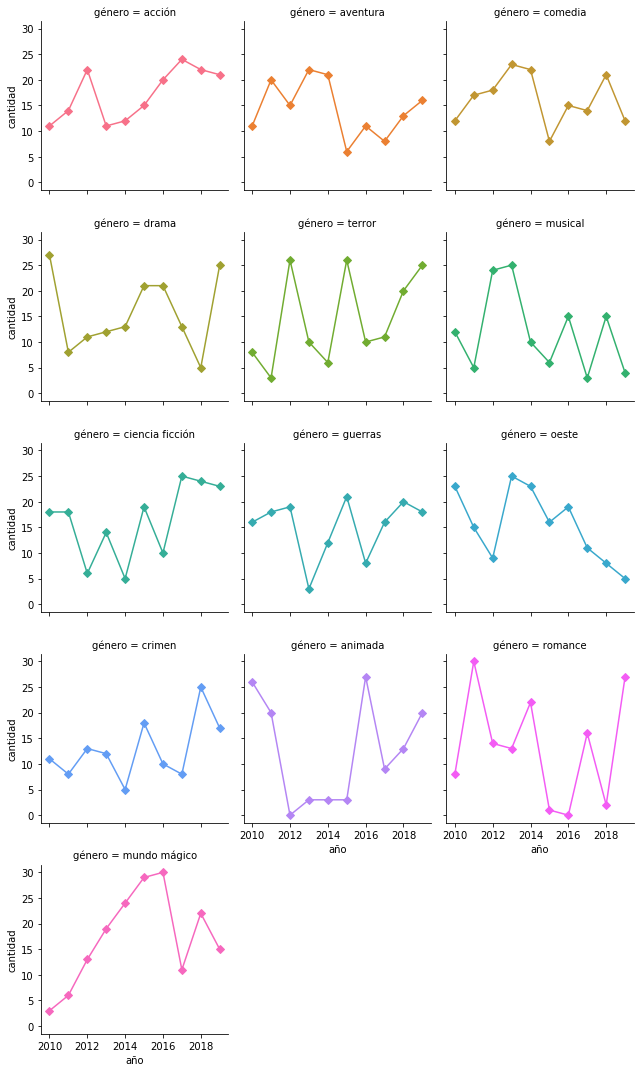

In [37]:
# Generar una grilla utilizando como variable el género
grid = sns.FacetGrid(data=dataset_peliculas, col="género", hue="género", col_wrap=3)
# Llamamos al método map que se encarga de llenar cada gráfico de la grilla utiliznado año en el eje X y cantidad en el Y
grid.map(plt.plot, "año", "cantidad", marker="D")

# Visualizar el gráfico
plt.show()

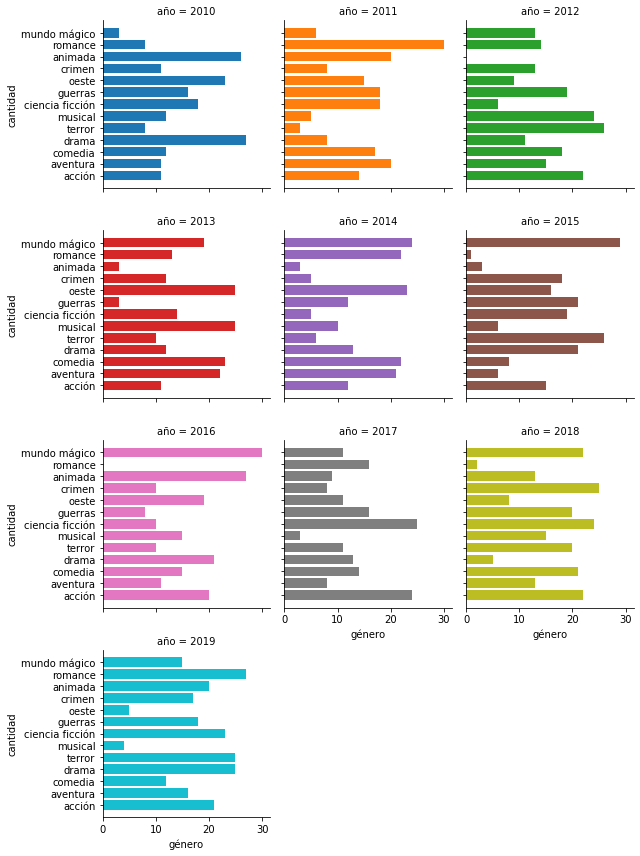

In [38]:
# Generar una grilla utilizando como variable el año 
grid = sns.FacetGrid(data=dataset_peliculas, col="año", hue="año", col_wrap=3)
# Llamamos al método map que se encarga de llenar cada gráfico de la grilla usando en el eje X el género y en el Y la cantidad
grid.map(plt.barh, "género", "cantidad")

# Visualizar el gráfico
plt.show()

¿Cuál de los dos gráficos permite comparar la tendencia de un género entre los diferentes años? R: El gráfico que mejor se adapta a esto es el de líneas puesto que permite identificar tendencias utilizando en el eje X una variable ordenada para representar cantidades, además se encuentra separado por género por lo que nos permite evaluar en cada uno su evolución en el tiempo.

¿Cuál de los dos gráficos permite identificar el género de películas más estrenados en 1 año específico? R: En este caso el que mejor se acomoda es el de barras horizontales puesto que se encuentran separados por año y permite ver para cada uno de los géneros la cantidad, independiente del orden uno puede identificar de inmediato los valores más grandes para cada género en cada año, por lo que la visualización cumple su objetivo.